In [ ]:
# Uploading last data that we have
import pandas as pd
BTC = pd.read_csv('Bitcoin3.csv')

In [ ]:
BTC

,time,low,high,open,close,volume,Bitcoin,Blockchain,buy bitcoin,crypto,cryptocurrency,unix_timestamp
0,2015-07-20 21:00:00,277.92,278.00,277.98,278.00,59.260456,3,0,0,0,0,1437426000
1,2015-07-20 22:00:00,277.37,278.50,278.00,278.14,346.995411,3,0,0,0,0,1437429600
2,2015-07-20 23:00:00,278.15,280.00,278.31,280.00,376.627552,3,0,0,0,0,1437433200
3,2015-07-21 00:00:00,279.38,281.00,279.96,280.89,288.177976,3,0,0,0,0,1437436800
4,2015-07-21 01:00:00,280.35,281.15,280.89,280.36,380.933023,3,0,0,0,0,1437440400
...,...,...,...,...,...,...,...,...,...,...,...,...
76115,2024-03-28 06:00:00,69609.86,70383.64,69688.89,70331.13,430.169089,69,4,1,29,2,1711605600
76116,2024-03-28 07:00:00,70165.93,70449.14,70342.43,70385.63,235.630213,70,4,1,27,2,1711609200
76117,2024-03-28 08:00:00,70277.17,70838.34,70386.48,70556.81,613.919833,70,4,1,30,2,1711612800
76118,2024-03-28 09:00:00,70496.78,70905.33,70556.58,70544.27,420.968324,77,4,1,34,3,1711616400


# Preproccesing

In [ ]:
df = BTC.copy()

Adding a new column that will be the target, 'close_lag_1h' has values of the following hour from column close, so, for some models that we will impliment - we will predict this value for the next hour.

In [ ]:
df[f'close_lag_1h'] = df['close'].shift(-1)

In [ ]:
df.dropna(inplace=True)

Also, adding another option for target column
'target' column has these values:


*   1 - if the close price in the next hour will rise
*   0 - if the close price in the next hour will decrease



In [ ]:
df['future_price_diff'] = df['close'] - df['close'].shift(-1)

# Create a binary column where 1 indicates the price will go up, and 0 indicates it will not
df['target'] = (df['future_price_diff'] < 0).astype(int)

In [ ]:
df.tail(8)

,time,low,high,open,close,volume,Bitcoin,Blockchain,buy bitcoin,crypto,cryptocurrency,unix_timestamp,close_lag_1h,future_price_diff,target
76111,2024-03-28 02:00:00,68841.01,69541.89,69403.84,69106.11,295.447249,62,5,1,28,2,1711591200,69250.42,-144.31,1
76112,2024-03-28 03:00:00,69018.23,69335.27,69104.37,69250.42,143.758433,64,4,1,28,2,1711594800,69689.04,-438.62,1
76113,2024-03-28 04:00:00,69234.01,69719.32,69243.79,69689.04,159.765961,67,4,1,30,2,1711598400,69689.84,-0.80,1
76114,2024-03-28 05:00:00,69566.77,69889.48,69685.38,69689.84,238.221471,68,4,1,28,2,1711602000,70331.13,-641.29,1
76115,2024-03-28 06:00:00,69609.86,70383.64,69688.89,70331.13,430.169089,69,4,1,29,2,1711605600,70385.63,-54.50,1
76116,2024-03-28 07:00:00,70165.93,70449.14,70342.43,70385.63,235.630213,70,4,1,27,2,1711609200,70556.81,-171.18,1
76117,2024-03-28 08:00:00,70277.17,70838.34,70386.48,70556.81,613.919833,70,4,1,30,2,1711612800,70544.27,12.54,0
76118,2024-03-28 09:00:00,70496.78,70905.33,70556.58,70544.27,420.968324,77,4,1,34,3,1711616400,70766.29,NaN,0


In [ ]:
df['target'].value_counts()

1    39135
0    36984
Name: target, dtype: int64

Adding columns with values for hour, day, month and year. Deleting timestamp column.

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['hour_of_day'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek  # Day of the week, where Monday=0, Sunday=6
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year

In [ ]:
df.drop(['unix_timestamp', 'future_price_diff'], axis=1, inplace = True)

## Normalizing

In [ ]:
df.columns

Index(['time', 'low', 'high', 'open', 'close', 'volume', 'Bitcoin',
       'Blockchain', 'buy bitcoin', 'crypto', 'cryptocurrency', 'close_lag_1h',
       'target', 'hour_of_day', 'day_of_week', 'month', 'year'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['low', 'high', 'open', 'close', 'volume']] =  scaler.fit_transform(df[['low',
        'high', 'open', 'close', 'volume']])

In [ ]:
df

,time,low,high,open,close,volume,Bitcoin,Blockchain,buy bitcoin,crypto,cryptocurrency,close_lag_1h,target,hour_of_day,day_of_week,month,year
0,2015-07-20 21:00:00,0.003793,0.000959,0.003775,0.001062,0.001872,3,0,0,0,0,278.14,1,21,0,7,2015
1,2015-07-20 22:00:00,0.003785,0.000966,0.003775,0.001064,0.011005,3,0,0,0,0,280.00,1,22,0,7,2015
2,2015-07-20 23:00:00,0.003796,0.000986,0.003780,0.001090,0.011946,3,0,0,0,0,280.89,1,23,0,7,2015
3,2015-07-21 00:00:00,0.003813,0.001000,0.003802,0.001102,0.009138,3,0,0,0,0,280.36,0,0,1,7,2015
4,2015-07-21 01:00:00,0.003826,0.001002,0.003815,0.001094,0.012082,3,0,0,0,0,280.37,1,1,1,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76114,2024-03-28 05:00:00,0.949575,0.946405,0.946551,0.946447,0.007552,68,4,1,28,2,70331.13,1,5,3,3,2024
76115,2024-03-28 06:00:00,0.950164,0.953117,0.946598,0.955181,0.013645,69,4,1,29,2,70385.63,1,6,3,3,2024
76116,2024-03-28 07:00:00,0.957754,0.954006,0.955475,0.955923,0.007470,70,4,1,27,2,70556.81,1,7,3,3,2024
76117,2024-03-28 08:00:00,0.959272,0.959292,0.956074,0.958255,0.019477,70,4,1,30,2,70544.27,0,8,3,3,2024


# Linear Regression

Linear Regression is the simplest model you can use for predictive tasks. It assumes a straight-line relationship between the features (like past prices, volume, etc.) and the closing price we're trying to predict.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [ ]:
#defining X variable with the features and y variable - the target column
X = df[['low', 'high', 'open', 'close', 'volume', 'Bitcoin',
       'Blockchain', 'buy bitcoin', 'crypto', 'cryptocurrency', 'hour_of_day', 'day_of_week', 'month', 'year']]
y = df['close_lag_1h']

In [ ]:
df

,time,low,high,open,close,volume,Bitcoin,Blockchain,buy bitcoin,crypto,cryptocurrency,close_lag_1h,target,hour_of_day,day_of_week,month,year
0,2015-07-20 21:00:00,0.003793,0.000959,0.003775,0.001062,0.001872,3,0,0,0,0,278.14,1,21,0,7,2015
1,2015-07-20 22:00:00,0.003785,0.000966,0.003775,0.001064,0.011005,3,0,0,0,0,280.00,1,22,0,7,2015
2,2015-07-20 23:00:00,0.003796,0.000986,0.003780,0.001090,0.011946,3,0,0,0,0,280.89,1,23,0,7,2015
3,2015-07-21 00:00:00,0.003813,0.001000,0.003802,0.001102,0.009138,3,0,0,0,0,280.36,0,0,1,7,2015
4,2015-07-21 01:00:00,0.003826,0.001002,0.003815,0.001094,0.012082,3,0,0,0,0,280.37,1,1,1,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76114,2024-03-28 05:00:00,0.949575,0.946405,0.946551,0.946447,0.007552,68,4,1,28,2,70331.13,1,5,3,3,2024
76115,2024-03-28 06:00:00,0.950164,0.953117,0.946598,0.955181,0.013645,69,4,1,29,2,70385.63,1,6,3,3,2024
76116,2024-03-28 07:00:00,0.957754,0.954006,0.955475,0.955923,0.007470,70,4,1,27,2,70556.81,1,7,3,3,2024
76117,2024-03-28 08:00:00,0.959272,0.959292,0.956074,0.958255,0.019477,70,4,1,30,2,70544.27,0,8,3,3,2024


## Training

In [ ]:
#Splitting the data in train and test with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#Create an instance of the Linear Regression class from sklearn.
model = LinearRegression()

In [ ]:
#Call the fit function , which applies the Linear Regression model
model.fit( X_train, y_train)

LinearRegression()

## Evaluation

In [ ]:
y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test), mean_absolute_error(y_pred, y_test)

(31684.95879887907, 79.1103334468355)

The mean absolute error we got is actualyy really good, it means that the average absolute error between predicted and actual values of close price is 81.4619...

In [ ]:
pd.DataFrame({'y_test': y_test, 'y_pred': list(y_pred)}, columns=['y_test', 'y_pred'])

,y_test,y_pred
64972,16593.69,16554.360956
44186,11649.07,11682.224927
33751,8742.40,8746.660582
54018,48074.36,48126.413824
72090,26687.69,26749.980422
...,...,...
65593,20757.77,20811.391758
40948,6273.77,6300.028944
10689,619.83,618.424735
63517,19135.14,19182.192903


## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 3, 4, 5,9]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (neg_mean_squared_error):", grid_search.best_score_)

Best parameters: {'fit_intercept': False, 'n_jobs': 1}
Best score (neg_mean_squared_error): -33207.18342108077


## Report

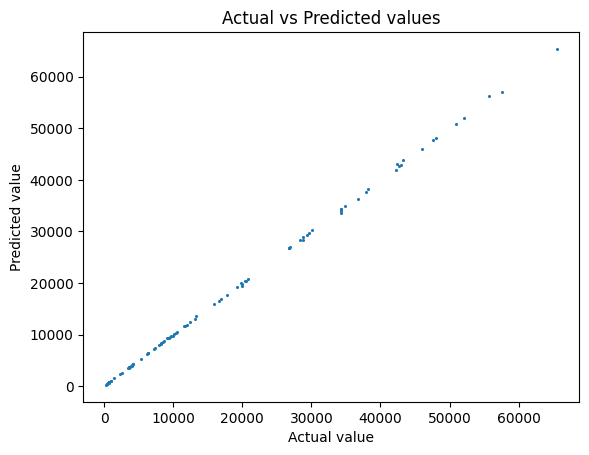

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test[:100], y_pred[:100], s = 1.5)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted values')
plt.show()

**Best score obtained with Linear Regression - mean_squared_error: 31684.95879887907**

***Linear Regression has the lowest MSE and MAE among the three models, indicating it performs the best in terms of both average error magnitude (MAE) and the consistency of those errors (MSE). Its :predictions are closest to the actual values and have the least variance in error.***

# XGBoost

XGBoost it's known for being powerful and efficient, especially in competitions where predictive accuracy is key. XGBoost works by building one tree at a time and correcting the errors of the previous trees. It's great for handling the kind of data that doesn't fit neatly into a linear model, which is often the case with financial data like cryptocurrency prices. Plus, it gave me insights into which features were most important for predicting prices.

In [ ]:
import xgboost as xgb

In [ ]:
X = df[['low', 'high', 'open', 'close', 'volume', 'Bitcoin',
       'Blockchain', 'buy bitcoin', 'crypto', 'cryptocurrency', 'hour_of_day', 'day_of_week', 'month', 'year']]
y = df['close_lag_1h']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgb.XGBRegressor(objective='reg:squarederror')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)


In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score (neg_mean_squared_error):", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 1}
Best score (neg_mean_squared_error): -47137.48521642537


## Evaluation

In [ ]:
y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}, Mean Absolute Error: {mae}")

Mean Squared Error: 42571.73064438326, Mean Absolute Error: 97.02033974358031


## Report

In [ ]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}, columns=['y_test', 'y_pred'])

,y_test,y_pred
64972,16593.69,16523.613281
44186,11649.07,11654.443359
33751,8742.40,8756.303711
54018,48074.36,47906.386719
72090,26687.69,26841.755859
...,...,...
65593,20757.77,20897.441406
40948,6273.77,6298.436035
10689,619.83,612.208374
63517,19135.14,19151.539062


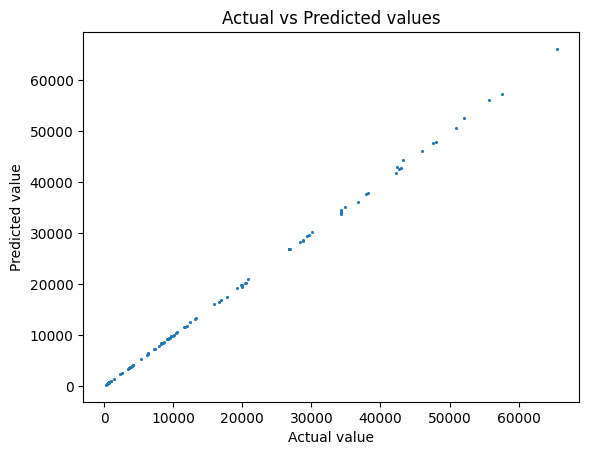

In [ ]:
plt.scatter(y_test[:100], y_pred[:100], s = 1.5)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted values')
plt.show()

# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [ ]:

from tensorflow.keras import layers

LSTM networks are also a great option because predicting prices isn't just about the numbers but about the sequence and timing of those numbers. LSTMs are a type of neural network designed specifically for sequence data. They remember information for long periods, which is crucial for understanding how past prices influence future prices. Implementing LSTM was more complex, but it was crucial for capturing the patterns in price movements over time.

## Training

In [ ]:
#X = np.array(X)
#X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
input_shape = (1, 14)
model = Sequential([
    Bidirectional(LSTM(50, activation='relu', return_sequences=True), input_shape=input_shape),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Assuming you have X_train, y_train, X_val, y_val prepared
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Reserving 20% of the training data for validation
    epochs=150,
    batch_size=64,
    callbacks=[early_stopping]
)

Epoch 1/150
667/667 [==============================] - 9s 7ms/step - loss: 331757152.0000 - val_loss: 287117504.0000
Epoch 2/150
667/667 [==============================] - 5s 8ms/step - loss: 275326560.0000 - val_loss: 252529312.0000
Epoch 3/150
667/667 [==============================] - 4s 6ms/step - loss: 189631600.0000 - val_loss: 106689328.0000
Epoch 4/150
667/667 [==============================] - 4s 6ms/step - loss: 114692248.0000 - val_loss: 86602560.0000
Epoch 5/150
667/667 [==============================] - 5s 8ms/step - loss: 98494392.0000 - val_loss: 77106880.0000
Epoch 6/150
667/667 [==============================] - 4s 6ms/step - loss: 87029864.0000 - val_loss: 64815412.0000
Epoch 7/150
667/667 [==============================] - 4s 6ms/step - loss: 75491456.0000 - val_loss: 55269140.0000
Epoch 8/150
667/667 [==============================] - 5s 7ms/step - loss: 65482668.0000 - val_loss: 44953452.0000
Epoch 9/150
667/667 [==============================] - 4s 6ms/step - loss

## Evaluation

In [ ]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

714/714 [==============================] - 3s 3ms/step


(602435.935365974, 589.0280236971427)

## Report

The model is a Sequential model utilizing a bidirectional LSTM layer followed by a dropout layer to reduce overfitting, another LSTM layer for further pattern recognition, another dropout layer, and a dense layer for output. This architecture helps to capture both past and future context in sequence data, which is beneficial for time-series datasets.

In [ ]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
val_loss = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

Training Loss: 612811.3750
Validation Loss: 602435.8750


Validation loss is lower that training loss which means the model is predicting well on new data.

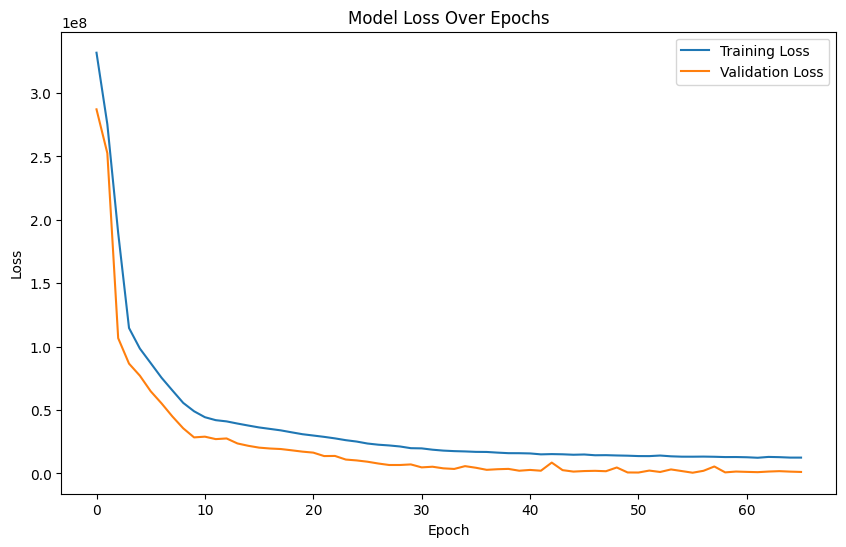

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()